<a href="https://colab.research.google.com/github/SefiyeArican/Ocular-Disease-Recognition/blob/main/Fundus_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING**

**Access to the dataset via google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/fundus.zip"

with zipfile.ZipFile(os.path.join(dataset_path), 'r') as zip_ref:
    zip_ref.extractall("/content/")

**Data loading and review**

In [3]:
import os
from PIL import Image

data_dir = '/content/ODIR-5K'

def count_images_in_directory(data_dir):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_count = 0

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue

    return image_count

data_dir = '/content/ODIR-5K/ODIR-5K/Testing Images'
print(f"Number of images in the Testing folder: {count_images_in_directory(data_dir)}")
data_dir = '/content/ODIR-5K/ODIR-5K/Training Images'
print(f"Number of images in the Training folder: {count_images_in_directory(data_dir)}")

Number of images in the Testing folder: 1000
Number of images in the Training folder: 7000


**What is the type of these images in the dataset?**

In [4]:
import os
from collections import defaultdict

data_dir = '/content/ODIR-5K'

def count_image_types(data_dir):
    # Create a dictionary of image types and numbers
    image_types = defaultdict(int)

    # Navigate files in folders and subfolders
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            # Get file extension
            ext = os.path.splitext(file)[1].lower()
            if ext in ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']:
                image_types[ext] += 1

    return image_types

print("Types of images in Testing folder:")
data_dir = '/content/ODIR-5K/ODIR-5K/Testing Images'
image_types_counts = count_image_types(data_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


print("Types of images in Training folder:")
data_dir = '/content/ODIR-5K/ODIR-5K/Training Images'
image_types_counts = count_image_types(data_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


Types of images in Testing folder:
.jpg: 1000 images
Types of images in Training folder:
.jpg: 7000 images


All images type is .jpg

**Visualization of the sample image**

This step allows us to learn about the dataset by selecting a random image from the dataset.

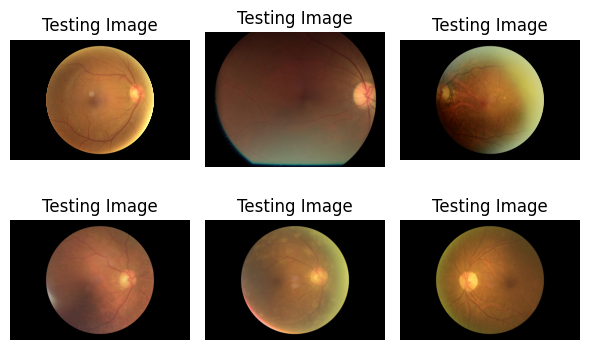

In [5]:
import matplotlib.pyplot as plt
import cv2
import os
import random

data_dir = '/content/ODIR-5K/ODIR-5K'

class_test = os.path.join(data_dir, 'Testing Images')
class_train = os.path.join(data_dir, 'Training Images')

# 6 farklı rastgele görüntü göstermek için
num_images_to_show = 6

plt.figure(figsize=(6, 4))

for i in range(num_images_to_show):
    # "train" veya "test" klasörlerinden rastgele birini seç
    selected_folder = random.choice([class_test, class_train])

    # Seçilen klasörden rastgele bir görüntü seç
    sample_image_path = os.path.join(selected_folder, random.choice(os.listdir(selected_folder)))

    # Görüntüyü oku
    image = cv2.imread(sample_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Görüntüyü alt plota ekle
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')
    folder_name = 'Testing' if selected_folder == class_test else 'Training'
    plt.title(f"{folder_name} Image")

plt.tight_layout()
plt.show()


The images are not all the same size and background cleaning is required.

In [9]:
import pandas as pd
df = pd.read_csv('/content/full_df.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg
